In [32]:
from google.colab import drive
drive.mount('/content/drive')
!git clone https://github.com/sajjad2014/FITYMI.git
!cp -r /content/drive/MyDrive/740_deeplearning/* /content/
!cp -r /content/FITYMI/* /content/
!cp -r /content/drive/MyDrive/740_deeplearning/Anomaly_detection/FITYMI/* /content/
!cp -r /content/drive/MyDrive/740_deeplearning/standard/* /content/
!pip install -r requirements.txt
!wget https://storage.googleapis.com/vit_models/imagenet21k/ViT-B_16.npz -P pretrained_models
!pip install faiss-gpu
!pip install ml_collections

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fatal: destination path 'FITYMI' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: torch-1.11.0+cu113-cp37-cp37m-linux_x86_64.whl is not a supported wheel on this platform.
--2023-04-03 01:01:46--  https://storage.googleapis.com/vit_models/imagenet21k/ViT-B_16.npz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 412815506 (394M) [application/octet-stream]
Saving to: ‘pretrained_models/ViT-B_16.npz.2’

ViT-B_16.npz.2      100%[===================>] 393.69M  12.8MB/s    in 34s     

2023-04-03 01:02:21 (11.7 MB/s) - ‘pretrained_models/ViT-B_16.npz.2

##CIFAR-10
First, download the generated samples for the CIFAR-10 dataset.
Then, train and evaluate the model on the first class of the dataset. Since the `--nnd` flag is used, the model is also evaluated in the one-vs-one setting.

In [28]:
import torch
import torchvision.datasets as datasets
import numpy as np
import os 

adv_data_path = '/content/AA_results_cifar10_L2/aa_standard_1_10000_eps_0.03137.pth'
adv_data = torch.load(adv_data_path)
adv_images = adv_data['adv_complete']
adv_images = (adv_images.cpu().numpy() * 255).astype(np.uint8)
adv_images = adv_images.transpose(0, 2, 3, 1)

!mkdir -p adv_data
np.save('adv_data/cifar10_adversarial.npy', adv_images)

# pass the new file path to gen_data_path argument
!python main.py --dataset cifar10 \
                --label 0 \
                --output_dir results_cifar10 \
                --normal_data_path data \
                --gen_data_path adv_data/cifar10_adversarial.npy \
                --pretrained_path pretrained_models/ViT-B_16.npz \
                --nnd \
                --download_dataset

Dataset: cifar10, Normal Label: 0
Files already downloaded and verified
Training Epoch : 0, Loss: 0.690755: 100% 157/157 [04:48<00:00,  1.84s/it]
Training Epoch : 1, Loss: 0.662317: 100% 157/157 [04:49<00:00,  1.84s/it]
Training Epoch : 2, Loss: 0.637310: 100% 157/157 [04:49<00:00,  1.84s/it]
Training Epoch : 3, Loss: 0.615397: 100% 157/157 [04:49<00:00,  1.84s/it]
Training Epoch : 4, Loss: 0.594417: 100% 157/157 [04:48<00:00,  1.84s/it]
Training Epoch : 5, Loss: 0.575092: 100% 157/157 [04:50<00:00,  1.85s/it]
Training Epoch : 6, Loss: 0.556503: 100% 157/157 [04:49<00:00,  1.85s/it]
Training Epoch : 7, Loss: 0.538537: 100% 157/157 [04:50<00:00,  1.85s/it]
Training Epoch : 8, Loss: 0.521780: 100% 157/157 [04:48<00:00,  1.84s/it]
Training Epoch : 9, Loss: 0.505078: 100% 157/157 [04:49<00:00,  1.85s/it]
Saving model
Files already downloaded and verified
Extract training feature space
Feature Extraction: 100% 79/79 [01:03<00:00,  1.24it/s]
Evaluate on the One-vs-All setting:
Files already 

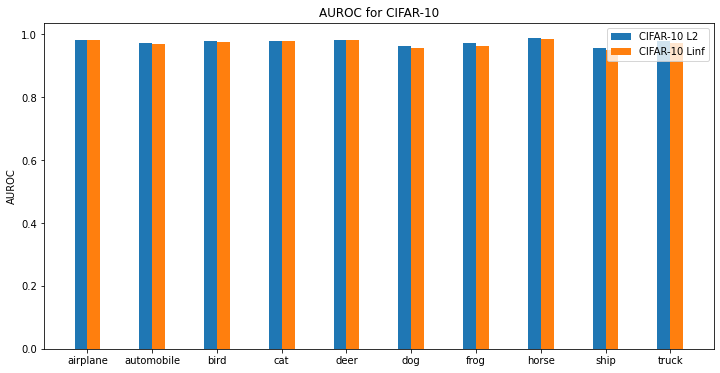

In [1]:
import matplotlib.pyplot as plt
import random

auroc_scores_L2 = [0.98099, 0.97413, 0.97904, 0.97924, 0.98295, 0.96282, 0.97172, 0.98808, 0.95705, 0.97766]
auroc_scores_Linf =  [0.98086, 0.97094, 0.97744, 0.97877, 0.98224, 0.95771, 0.963, 0.98662, 0.95035, 0.97226]

 
def barplot_auroc(auroc_cifar10_l2, auroc_cifar10_linf):
    plt.figure(figsize=(12, 6))

    cifar10_categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    x = range(len(cifar10_categories))

    plt.bar(x, auroc_cifar10_l2, width=0.2, label='CIFAR-10 L2')
    plt.bar([i + 0.2 for i in x], auroc_cifar10_linf, width=0.2, label='CIFAR-10 Linf')

    plt.xticks([i + 0.1 for i in x], cifar10_categories)
    plt.ylabel('AUROC')
    plt.title('AUROC for CIFAR-10')
    plt.legend()
    plt.savefig('C:/Users/Labadmin/Desktop/machin learning utech/deeplearning/ECE 740/Final_project/Final/Final_Project/Anomaly_detection/FITYMI/CIFAR10', dpi=300, bbox_inches='tight')
    plt.show()

barplot_auroc(auroc_scores_L2, auroc_scores_Linf)

##CIFAR-100
Similar to the previous section, download the generated samples for the CIFAR-100 dataset.
Then, train and evaluate the model on the first class of the dataset.

In [ ]:
import torch
import torchvision.datasets as datasets
import numpy as np

adv_data_path = '/content/AA_results_cifar100_Linf/aa_standard_1_10000_eps_0.03137.pth'
adv_data = torch.load(adv_data_path)
adv_images = adv_data['adv_complete']
adv_images = (adv_images.cpu().numpy() * 255).astype(np.uint8)
adv_images = adv_images.transpose(0, 2, 3, 1)

!mkdir -p adv_data
np.save('adv_data/cifar100_adversarial.npy', adv_images)

# pass the new file path to gen_data_path argument
!python main.py --dataset cifar100 \
                --label 0 \
                --output_dir results_cifar100 \
                --normal_data_path data \
                --gen_data_path adv_data/cifar100_adversarial.npy \
                --pretrained_path pretrained_models/ViT-B_16.npz \
                --nnd \
                --download_dataset

Dataset: cifar100, Normal Label: 0
Files already downloaded and verified
Training Epoch : 0, Loss: 0.687425: 100% 79/79 [02:21<00:00,  1.79s/it]
Training Epoch : 1, Loss: 0.675861: 100% 79/79 [02:23<00:00,  1.82s/it]
Training Epoch : 2, Loss: 0.666303: 100% 79/79 [02:24<00:00,  1.83s/it]
Training Epoch : 3, Loss: 0.657080: 100% 79/79 [02:24<00:00,  1.83s/it]
Training Epoch : 4, Loss: 0.647647: 100% 79/79 [02:24<00:00,  1.83s/it]
Training Epoch : 5, Loss: 0.638508: 100% 79/79 [02:24<00:00,  1.83s/it]
Training Epoch : 6, Loss: 0.629426: 100% 79/79 [02:24<00:00,  1.83s/it]
Training Epoch : 7, Loss: 0.621830: 100% 79/79 [02:24<00:00,  1.83s/it]
Training Epoch : 8, Loss: 0.613024: 100% 79/79 [02:24<00:00,  1.83s/it]
Training Epoch : 9, Loss: 0.604534: 100% 79/79 [02:24<00:00,  1.83s/it]
Saving model
Files already downloaded and verified
Extract training feature space
Feature Extraction: 100% 40/40 [00:31<00:00,  1.25it/s]
Evaluate on the One-vs-All setting:
Files already downloaded and veri

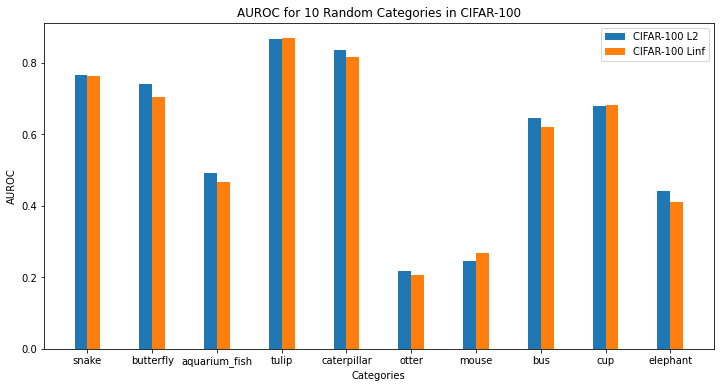

In [15]:
import matplotlib.pyplot as plt
import random

auroc_scores_L2 = [0.7735699999999999, 0.4911, 0.56694, 0.25065000000000004, 0.19399999999999998, 
                         0.56005, 0.58929, 0.7730699999999999, 0.63444, 0.68271, 0.80879, 0.58726, 
                         0.65867, 0.64377, 0.74132, 0.26003, 0.77549, 0.68404, 0.8351, 0.4236, 
                         0.62585, 0.27132999999999996, 0.77322, 0.26808, 0.69334, 0.5820000000000001, 
                         0.79657, 0.5105200000000001, 0.67769, 0.68234, 0.050390000000000004, 
                         0.43986000000000003, 0.7565500000000001, 0.46179000000000003, 0.19499, 0.56219, 
                         0.20563, 0.5297000000000001, 0.295535, 0.4549099999999999, 0.64739, 0.58714, 
                         0.4729, 0.48969, 0.73986, 0.7276400000000001, 0.4346, 0.42002, 0.6676200000000001, 
                         0.35547, 0.245, 0.68658, 0.23697, 0.722645, 0.7601100000000001, 
                         0.21705000000000002, 0.43749000000000005, 0.83427, 0.67699, 0.35094000000000003, 
                         0.50939, 0.83881, 0.78761, 0.4389200000000001, 0.45433, 0.29036, 0.51349, 
                         0.37977999999999995, 0.58402, 0.36985500000000004, 0.8587, 0.29869999999999997, 
                         0.16155999999999998, 0.12535, 0.39735999999999994, 0.54904, 0.70865, 
                         0.6465799999999999, 0.7642, 0.7471, 0.31442000000000003, 0.56436, 0.585735, 
                         0.6486799999999999, 0.58975, 0.66293, 0.66789, 0.56632, 0.45646000000000003, 
                         0.63967, 0.53732, 0.6886000000000001, 0.8665799999999999, 0.38132999999999995, 
                         0.53018, 0.06865, 0.421, 0.53135, 0.5724, 0.78275]

auroc_scores_Linf = [0.79659, 0.46586, 0.5561200000000001, 0.25534, 0.19175, 0.5533399999999999, 0.5760200000000001, 0.77493, 0.6412, 0.67511, 0.8084100000000001, 0.56319, 0.64079, 0.62012, 0.70451, 0.27579, 0.7771399999999999, 0.6678400000000001, 0.81445, 0.44869500000000007, 0.64167, 0.24604000000000004, 0.76486, 0.24522, 0.6851200000000001, 0.55876, 0.7857700000000001, 0.49261999999999995, 0.6807599999999999, 0.65231, 0.04895, 0.41112000000000004, 0.7359899999999999, 0.41459999999999997, 0.19918, 0.5535400000000001, 0.24884000000000003, 0.51347, 0.3029, 0.41698, 0.62309, 0.5789799999999999, 0.49312, 0.4979, 0.71312, 0.7060199999999999, 0.41759, 0.39548, 0.65259, 0.32898000000000005, 0.26791000000000004, 0.70251, 0.2079, 0.7342299999999999, 0.7667600000000001, 0.20648999999999998, 0.43744000000000005, 0.83806, 0.66248, 0.31469, 0.47158000000000005, 0.8349000000000001, 0.7841499999999999, 0.44634, 0.46123, 0.27854, 0.4981, 0.36941, 0.55898, 0.36006, 0.8624, 0.29572, 0.16349999999999995, 0.12063, 0.39147, 0.51141, 0.6902800000000001, 0.6401, 0.763, 0.72346, 0.30106999999999995, 0.5572199999999999, 0.61514, 0.66066, 0.57628, 0.6322699999999999, 0.668, 0.5275000000000001, 0.45448, 0.6350199999999999, 0.52413, 0.67084, 0.8677099999999999, 0.37297, 0.51263, 0.07063000000000001, 0.37644999999999995, 0.5353600000000001, 0.56074,0.76484]

 
def barplot_auroc(auroc_cifar100_l2, auroc_cifar100_linf):
    plt.figure(figsize=(12, 6))

    cifar100_categories = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

    random_indices = random.sample(range(len(cifar100_categories)), 10)
    selected_categories = [cifar100_categories[i] for i in random_indices]
    selected_auroc_l2 = [auroc_cifar100_l2[i] for i in random_indices]
    selected_auroc_linf = [auroc_cifar100_linf[i] for i in random_indices]

    x = range(len(selected_categories))

    plt.bar(x, selected_auroc_l2, width=0.2, label='CIFAR-100 L2')
    plt.bar([i + 0.2 for i in x], selected_auroc_linf, width=0.2, label='CIFAR-100 Linf')

    plt.xticks([i + 0.1 for i in x], selected_categories)
    plt.xlabel('Categories')
    plt.ylabel('AUROC')
    plt.title('AUROC for 10 Random Categories in CIFAR-100')
    plt.legend()
    plt.savefig('C:/Users/Labadmin/Desktop/machin learning utech/deeplearning/ECE 740/Final_project/Final/Final_Project/Anomaly_detection/FITYMI/CIFAR100', dpi=300, bbox_inches='tight')
    plt.show()


barplot_auroc(auroc_scores_L2, auroc_scores_Linf)

Note: you may need to restart the kernel to use updated packages.
